In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

In [2]:
names1880 =pd.read_csv("C:/Users/USER/Desktop/dataset/deepL/babynames/yob1880.txt",
                       names=['name','sex','births'])

In [3]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [4]:
names1880.groupby('sex').births.sum() # 성별 기준 그룹화

sex
F     90993
M    110493
Name: births, dtype: int64

In [5]:
# 연도별 테이블 병합
pieces = []
for year in range(1880,2011):
    df = pd.read_csv('C:/Users/USER/Desktop/dataset/deepL/babynames/yob%d.txt' %year,
                     names=['name','sex','births'])
    df['year'] = year
    pieces.append(df)

In [6]:
pieces

[           name sex  births  year
 0          Mary   F    7065  1880
 1          Anna   F    2604  1880
 2          Emma   F    2003  1880
 3     Elizabeth   F    1939  1880
 4        Minnie   F    1746  1880
 ...         ...  ..     ...   ...
 1995     Woodie   M       5  1880
 1996     Worthy   M       5  1880
 1997     Wright   M       5  1880
 1998       York   M       5  1880
 1999  Zachariah   M       5  1880
 
 [2000 rows x 4 columns],
            name sex  births  year
 0          Mary   F    6919  1881
 1          Anna   F    2698  1881
 2          Emma   F    2034  1881
 3     Elizabeth   F    1852  1881
 4      Margaret   F    1658  1881
 ...         ...  ..     ...   ...
 1930     Wiliam   M       5  1881
 1931     Wilton   M       5  1881
 1932       Wing   M       5  1881
 1933       Wood   M       5  1881
 1934     Wright   M       5  1881
 
 [1935 rows x 4 columns],
            name sex  births  year
 0          Mary   F    8149  1882
 1          Anna   F    3143  1882

In [7]:
df

,name,sex,births,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


In [8]:
len(pieces)

131

In [9]:
# 하나의 데이터 프레임으로
names = pd.concat(pieces,ignore_index=True) # 합치고자 하는 data, ignore_index =T >> 새로운 인덱스
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [10]:
names.info() # pd 에서 object >> 문자열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   sex     1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [11]:
# sex  F    M
# year
# 1880
# ...  ...  ...
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [12]:
# pivot table 만들기
# 연도별 성별에 따른 태어난 아이들의 합계
names.pivot_table('births',aggfunc=sum, index='year',columns='sex') # index = 행기준
# 연도별 성별에 따른 태어난 아이들의 평균
names.pivot_table('births',aggfunc=np.mean, index='year',columns='sex') # index = 행기준

sex,F,M
year,,
1880,96.595541,104.435728
1881,98.033049,101.051153
1882,104.913424,103.445860
1883,106.567362,101.584466
1884,110.086177,101.728889
...,...,...
2006,94.690833,146.330312
2007,93.415595,144.067535
2008,92.263176,139.294722


In [13]:
total_births = names.pivot_table('births',aggfunc=sum, index='year',columns='sex')
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


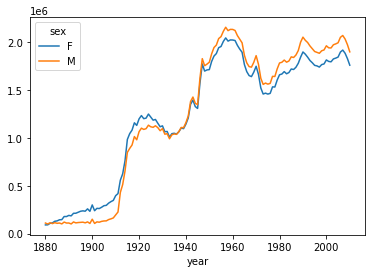

In [14]:
total_births.plot()

In [15]:
# names에서 sex와 year 기준으로 group 만들기
names.head()
def add_prop(group):
    group['prop'] = group.births/group.births.sum()
    return group

In [19]:
names = names.groupby(['year','sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [21]:
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [42]:
# 각 연도 / 성별에 따른 선호 이름 1000개씩 추출
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]
    #ascending = False : 내림차순 정렬
    
top1000 = names.groupby(['year','sex']).apply(get_top1000)
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [43]:
top1000.reset_index(inplace=True,drop=True) # inplace = True >> 제자리 수정 (할당없이)

In [44]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [69]:
# 연도별 이름 트렌드 변화
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [ ]:
""" John Mary ... Micheal...
year
1880
...
2010
"""

In [50]:
total_births = top1000.pivot_table('births',index = 'year',columns='name',aggfunc=sum)

In [52]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [ ]:
# 131 rows × 6868 columns
# 131년(1880~2010)
# 6868 : 1880~2010 각 연도별 인기있는 이름 상위 1000개씩 추출 했을때 중복을 제외한(unique) 이름에 대한 종류의 갯수
# Aaden은 인기가 없다가 마지막 3년에 나옴

In [54]:
total_births['John']

year
1880     9701.0
1881     8795.0
1882     9597.0
1883     8934.0
1884     9427.0
         ...   
2006    15140.0
2007    14405.0
2008    13273.0
2009    12048.0
2010    11424.0
Name: John, Length: 131, dtype: float64

In [55]:
total_births['Harry']

year
1880    2158.0
1881    2002.0
1882    2246.0
1883    2116.0
1884    2338.0
         ...  
2006     414.0
2007     443.0
2008     379.0
2009     383.0
2010     363.0
Name: Harry, Length: 131, dtype: float64

In [56]:
subset = total_births[['John','Harry','Mary','Marilyn']]

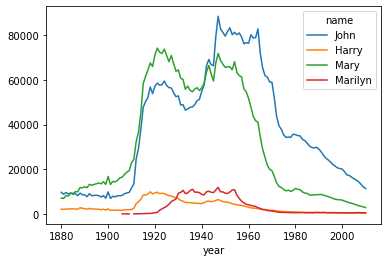

In [57]:
subset.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000220DC9A85E0>,
      dtype=object)

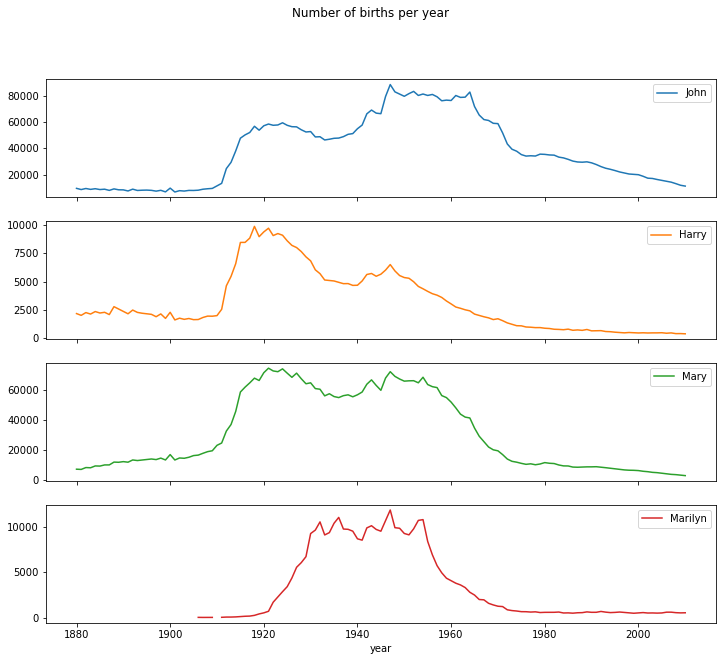

In [59]:
subset.plot(subplots=True,figsize=(12,10), title='Number of births per year')

In [ ]:
# 이름 사용 경향에 대한 다양성 측면에서 분석
# 흔한 이름은 기피하는지

In [ ]:
'''
top1000 <- 1000등
top1000에 대해 누적 비율
1880 John  7%    7%
     Mary  6%    13%
    ...
    Michael 2%   51%  => 이름 종류 30가지
    ...
    
2010 John  2%    2%
     Mary  1%    3%
    ...
    Michael 0.2%   51%  => 이름 종류 200가지
    ...    "
'''

# 인기있는 이름 1000개가 전체 출생수에서 차지하는 비율을
# 연도별/성별 그래프로 출력

In [60]:
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [63]:
table = top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum) 
# 합이 1이 안되는 것 >> top1000에 못들어간 이름이 있다
# 2010년 F 중 top1000에 들어가는 이름 비율 = 0.7367
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


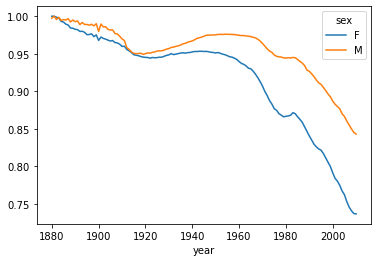

In [64]:
table.plot()

In [ ]:
# 2010년 상위 50% 비중을 차지하는 이름 갯수 세기

In [70]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [75]:
df.sort_values(by='name')
prop_cumsum = df.sort_values(by='prop',ascending=False).prop.cumsum()
# 누적합 50% 넘는
prop_cumsum.values

array([0.01152297, 0.02093414, 0.0299592 , 0.03892999, 0.04781651,
       0.05657871, 0.06515496, 0.0734141 , 0.08152785, 0.08962106,
       0.09764789, 0.10540608, 0.11285189, 0.12027558, 0.12767241,
       0.13502288, 0.14236755, 0.14960266, 0.15682671, 0.16402073,
       0.17072223, 0.17719089, 0.18345201, 0.18965519, 0.19581465,
       0.2018324 , 0.20776851, 0.21357767, 0.21935364, 0.22507009,
       0.23057741, 0.23605576, 0.24151251, 0.24696821, 0.25239072,
       0.25747663, 0.26250776, 0.26753783, 0.27241251, 0.27717762,
       0.28179576, 0.28638704, 0.29085031, 0.29530516, 0.29975263,
       0.30404892, 0.30833468, 0.31260199, 0.31681137, 0.32091592,
       0.32494882, 0.32897594, 0.33294458, 0.33688004, 0.3407644 ,
       0.34463822, 0.34849361, 0.3523274 , 0.35615751, 0.35991702,
       0.36365547, 0.36736863, 0.37107073, 0.3746738 , 0.37809039,
       0.38146011, 0.38479453, 0.38812526, 0.39140226, 0.3945207 ,
       0.39752379, 0.40042626, 0.40320231, 0.40597309, 0.40872

In [77]:
prop_cumsum.values.searchsorted(0.5)+1 #전체 중 절반에 해당되는 이름의 종류

117

In [80]:
prop_cumsum.iloc[116]

0.5006516075268308

In [ ]:
# boys에 저장된 1900년도 데이터에 대해서
# 누적합을 구했을 때 0.5 초과되는 지점까지 이름의 종류의 개수?
# 2010년 117개이름 1900년 ?개 이름

In [85]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop',ascending=False).prop.cumsum()
in1900.values
in1900.values.searchsorted(0.5)+1

25

In [91]:
# 0.5 넘어가는 index 구하는 function
def get_quantile_count(group,q =0.5):
    group = group.sort_values(by='prop',ascending=False)
    return group.prop.cumsum().values.searchsorted(0.5)+1

In [92]:
diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity

year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2008  M      109
2009  F      241
      M      114
2010  F      246
      M      117
Length: 262, dtype: int64

In [93]:
diversity.unstack('sex')

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


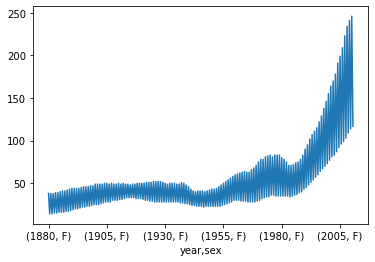

In [94]:
diversity.plot()

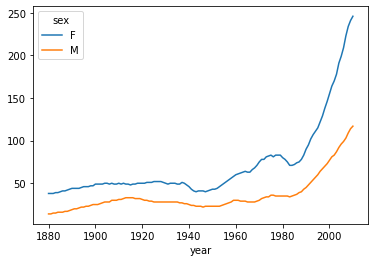

In [95]:
diversity.unstack('sex').plot()

In [96]:
## 이름의 마지막 글자의 변화
# 마지막 글자의 변화
names.name
# name열의 값에 대해 마지막 글자만 출력

0               Mary
1               Anna
2               Emma
3          Elizabeth
4             Minnie
             ...    
1690779      Zymaire
1690780       Zyonne
1690781    Zyquarius
1690782        Zyran
1690783        Zzyzx
Name: name, Length: 1690784, dtype: object

In [99]:
names.name.str[-1] # .str >> 문자열 변형

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: name, Length: 1690784, dtype: object

In [100]:
end_letter = []
for i in range(len(names.name.values)):
    end_letter.append(names.name.values[i][-1])

In [101]:
mylambda = lambda x:x[-1]
last_letters = names.name.map(mylambda)
last_letters.names = 'last_letter'

In [102]:
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: name, Length: 1690784, dtype: object

In [106]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [105]:
table = names.pivot_table('births',index=last_letters,
                     columns=['sex','year'],
                     aggfunc=sum)
table
# 1880년에 태어난 여자 아이들에 대해 이름의 마지막 글자가 a로 끝나는 아이의 수가 31446명이다

sex         F                                                                 \
year     1880     1881     1882     1883     1884     1885     1886     1887   
name                                                                           
a     31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0  48942.0   
b         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c         NaN      NaN      5.0      5.0      NaN      NaN      NaN      NaN   
d       609.0    607.0    734.0    810.0    916.0    862.0   1007.0   1027.0   
e     33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0  54353.0   
f         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g         7.0      5.0     12.0      8.0     24.0     11.0     18.0     25.0   
h      4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   7141.0   
i        61.0     78.0     81.0     76.0     84.0     92.0     85.0    105.0   
j         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k        13.0     15.0     11.0     17.0     21.0     18.0     27.0     19.0   
l      2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   6175.0   
m        58.0     57.0     81.0     86.0     79.0     75.0    103.0     90.0   
n      3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   5512.0   
o        30.0     49.0     35.0     47.0     74.0     84.0     93.0     97.0   
p         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r       481.0    417.0    590.0    640.0    718.0    799.0    917.0    910.0   
s      1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   2803.0   
t      2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   3140.0   
u       380.0    427.0    410.0    444.0    490.0    495.0    511.0    476.0   
v         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w         NaN      5.0      NaN      NaN      NaN      NaN      5.0      NaN   
x         NaN      NaN      NaN      7.0      NaN      NaN      NaN      NaN   
y     10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0  14980.0   
z       106.0     95.0    106.0    141.0    148.0    150.0    202.0    188.0   

sex                     ...         M                                          \
year     1888     1889  ...      2001      2002      2003      2004      2005   
name                    ...                                                     
a     59442.0  58631.0  ...   39124.0   38815.0   37825.0   38650.0   36838.0   
b         NaN      NaN  ...   50950.0   49284.0   48065.0   45914.0   43144.0   
c         NaN      NaN  ...   27113.0   27238.0   27697.0   26778.0   26078.0   
d      1298.0   1374.0  ...   60838.0   55829.0   53391.0   51754.0   50670.0   
e     66750.0  66663.0  ...  145395.0  144651.0  144769.0  142098.0  141123.0   
f         NaN      NaN  ...    1758.0    1817.0    1819.0    1904.0    1985.0   
g        44.0     28.0  ...    2151.0    2084.0    2009.0    1837.0    1882.0   
h      8630.0   8826.0  ...   85959.0   88085.0   88226.0   89620.0   92497.0   
i       141.0    134.0  ...   20980.0   23610.0   26011.0   28500.0   31317.0   
j         NaN      NaN  ...    1069.0    1088.0    1203.0    1094.0    1291.0   
k        21.0     22.0  ...   42477.0   42043.0   42296.0   41400.0   42151.0   
l      7900.0   8395.0  ...  153648.0  153493.0  153862.0  152800.0  155312.0   
m       123.0    137.0  ...   41967.0   42663.0   42790.0   43054.0   41600.0   
n      6833.0   7103.0  ...  616099.0  630322.0  663419.0  676011.0  686326.0   
o       134.0    142.0  ...   82146.0   83180.0   85423.0   88822.0   92001.0   
p         NaN      NaN  ...    3419.0    3157.0    2982.0    2841.0    2768.0   
q         NaN      NaN  ...     602.0     618.0     585.0     523.0     446.0   
r      1207.0   1214.0  ...  165377.0  164821.0  169878.0  

In [110]:
sub_table = table.reindex(columns=[1910,1960,2010], level='year')
sub_table

sex          F                            M                    
year      1910      1960      2010     1910      1960      2010
name                                                           
a     108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b          NaN     694.0     450.0    411.0    3912.0   38859.0
c          5.0      49.0     946.0    482.0   15476.0   23125.0
d       6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e     133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f          NaN      20.0      97.0    152.0    9224.0    2255.0
g         57.0     318.0     657.0    437.0   20235.0    2666.0
h      20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i        605.0   80812.0   55820.0    164.0    1286.0   42956.0
j          NaN       NaN     159.0      NaN       NaN    1459.0
k         48.0     315.0     626.0   7104.0  105315.0   35198.0
l      17121.0   68482.0   46360.0  12626.0  223716.0  133583.0
m        476.0   17417.0    4552.0  11272.0   72139.0   46808.0
n      31412.0  264258.0  246631.0  27851.0  325266.0  688677.0
o        658.0    4932.0    2187.0   3314.0   27358.0   81025.0
p          7.0      47.0      35.0    616.0   12102.0    2409.0
q          NaN       NaN      53.0      NaN       NaN     342.0
r       5308.0   13677.0   31707.0  12522.0   66183.0  166064.0
s      15477.0   25810.0   23451.0  25404.0  219080.0  123670.0
t      10877.0   30738.0   13773.0  14153.0  140015.0   43398.0
u        271.0    1161.0     734.0     24.0     122.0    2318.0
v          NaN     122.0     205.0     22.0      78.0    2723.0
w          8.0      63.0    2080.0   1229.0   16444.0   30656.0
x          6.0      74.0    1279.0    770.0    3947.0   16352.0
y      43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z        967.0    1333.0    1238.0     33.0     392.0    3476.0

In [111]:
sub_table.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [112]:
letter_prop = sub_table/sub_table.sum()
letter_prop

sex          F                             M                    
year      1910      1960      2010      1910      1960      2010
name                                                            
a     0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b          NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c     0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d     0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e     0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f          NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g     0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h     0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i     0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j          NaN       NaN  0.000090       NaN       NaN  0.000769
k     0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l     0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m     0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n     0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o     0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p     0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q          NaN       NaN  0.000030       NaN       NaN  0.000180
r     0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s     0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t     0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u     0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v          NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w     0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x     0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y     0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z     0.002439  0.000659  0.000704  0.000170  0.000184  0.001831